In [22]:
import numpy as np
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

df = pd.read_csv("archive/Folds.csv")
df = df.sample(frac=1)
path = "archive/BreaKHis_v1/"

In [24]:
train_image = []
y = []

for i in tqdm(range(df.shape[0])):
    img = image.load_img(path + df['filename'].iloc[i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    
    if (df['filename'].iloc[i].find('benign') != -1): 
        y.append(0) 
    else:
        y.append(1)
        
X = np.array(train_image)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)
Y_val = np_utils.to_categorical(y_val, 2)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 39545/39545 [16:12<00:00, 40.66it/s]


(31636, 28, 28, 3)
(6327, 28, 28, 3)
(1582, 28, 28, 3)


In [25]:
print(sum(y==0))
print(sum(y==1))
print(sum(y==0) + sum(y==1) )
print(X.shape)

12400
27145
39545
(39545, 28, 28, 3)


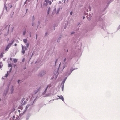

In [26]:
#benign
i=0 
image.load_img(path + df['filename'].iloc[i], target_size=(120,120,1), grayscale=False)

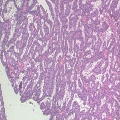

In [27]:
#malignant
i=1 
image.load_img(path + df['filename'].iloc[i], target_size=(120,120,1), grayscale=False)

In [28]:
model = Sequential()
#convlouton layer with the number of filters, filter size, strides steps, padding, activation type and the input shape.
model.add(Conv2D(30, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,3)))
#pooling layer to reduce the volume of input image after convolution
model.add(MaxPool2D(pool_size=(1,1)))
#flatten layer to flatten the output
model.add(Flatten())   
model.add(Dense(150, activation='relu'))  # this line represents hidden layer of 150 neuron
model.add(Dense(2, activation='softmax'))  # this line represents output layer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs = 5, validation_data=(X_test, Y_test))

Train on 31636 samples, validate on 6327 samples
Epoch 1/5
31636/31636 [==============================] - 160s 5ms/step - loss: 0.4440 - accuracy: 0.8182 - val_loss: 0.3663 - val_accuracy: 0.8565
Epoch 2/5
31636/31636 [==============================] - 152s 5ms/step - loss: 0.3492 - accuracy: 0.8595 - val_loss: 0.3203 - val_accuracy: 0.8740
Epoch 3/5
31636/31636 [==============================] - 161s 5ms/step - loss: 0.2378 - accuracy: 0.9078 - val_loss: 0.1771 - val_accuracy: 0.9330
Epoch 4/5
31636/31636 [==============================] - 148s 5ms/step - loss: 0.1326 - accuracy: 0.9516 - val_loss: 0.0826 - val_accuracy: 0.9700
Epoch 5/5
31636/31636 [==============================] - 219s 7ms/step - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.0455 - val_accuracy: 0.9872


<AxesSubplot:>

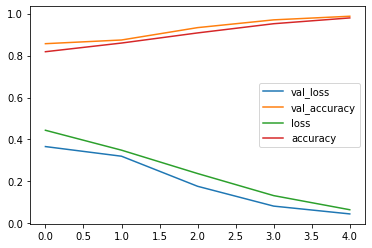

In [29]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [30]:
y_pred = model.predict_classes(X_val)
acc_test = 0

for i in range(X_val.shape[0]):
    if(y_pred[i] == y_val[i]):
        acc_test= acc_test+1
print("Accuracy test : "  , acc_test/X_val.shape[0]*100)

Accuracy test :  98.98862199747155
